### Задача 1.2 Метод Зейделя

Количество итераций: 325 
Ошибка: 0.0034106069722583507


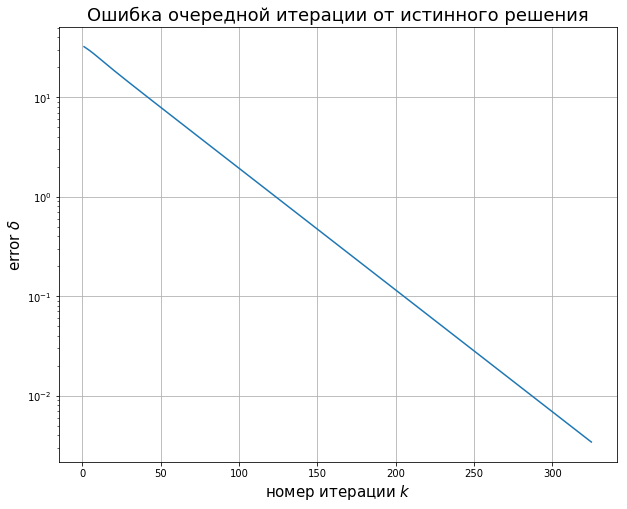

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 5  #размерность матрицы
A = np.random.rand(n, n)  #задаем случайно матрицу размера nxn 
A = A @ A.transpose()  #получаем симметричную, положительно определенную матрицу
b = np.random.rand(n) #задаем правую часть уравнения вектор b
solution = np.linalg.solve(A, b) #получаем точное решение
#Реализуем метод Зейделя
epsilon = 0.0001  #задаем точность 
u = np.random.rand(n)  #случайный вектор u_0 
errors = [] #массив ошибок, относительно точного решения
k = 1
while True:
    prev = u.copy()
    for i in range (0, n):
        total = 0
        for j in range(0, n):
            if i == j:
                continue
            total -= (A[i][j] * u[j])
        total += b[i]
        total /= A[i][i]
        u[i] = total
    errors.append(np.linalg.norm((u - solution), 2))
    if(np.linalg.norm((u - prev), 2) < epsilon):
        break
    k += 1
print("Количество итераций: {0} \nОшибка: {1}".format(k, np.linalg.norm((u - solution), 2)))
plt.figure(figsize=(10, 8))
plt.title('Ошибка очередной итерации от истинного решения', fontsize=18)
plt.semilogy(np.arange(1, k + 1), errors)
plt.ylabel(r'error $\delta$', fontsize=15)
plt.xlabel(r'номер итерации $k$', fontsize=15)
plt.grid()

#### Описание происходящего:

Представим матрицу $A = L + D + U$, $L$ - верхняя треугольная, $D$ - диаганольная, $U$ - нижняя треугольная, тогда
$$(L + D + U)u = b,$$ $$u^{(k+1)} = -D^{-1}(L + U)u^{(k)} + D^{-1}b$$.